### Nombre y apellidos: Gabriel Blanco García.  
#### Máster en Data Science para Finanzas: Machine Learning.  

Madrid, noviembre de 2020

# Práctica 2
## Conceptos básicos: regresión logística y descenso del gradiente en Python

# Índice 

1. [Objetivo de la práctica](#Objetivo-de-la-prática)
2. [Explicación teórica](#Explicación-teórica)  
    2.1 [Un ejemplo simple](#Un-ejemplo-simple)  
    2.2 [Concepto matemático y aplicación en regresión logística](#Concepto-matemático-y-aplicación-en-regresión-logística)
3. [Implementación práctica](#Implementación-práctica)  
    3.1 [Caso práctico: acceso a la universidad](#Caso-práctico:-acceso-a-la-universidad)  
    3.2 [Datos](#Datos)  
    3.3 [Definición de la función Sigmoide](#Definición-de-la-función-Sigmoide)  
    3.4 [Definición de la función de coste](#Definición-de-la-función-de-coste)   
    3.5 [Definición de los valores iniciales](#Definición-de-los-valores-iniciales])     
    3.6 [Descenso del gradiente](#Descenso-del-gradiente)  
    3.7 [Visualización del descenso](#Visualización-del-descenso)    
4. [Predicciones](#Predicciones)
5. [Referencias](#Referencias)
    

# Objetivo de la práctica
El objetivo de esta práctica es explicar con el mayor grado de detalle posible el concepto del descenso del gradiente y su uso en Machine Learning. Para ello, primero se ejemplifica y se explica el concepto de manera teórica, y después se pone en práctica con Python, y se demuestra su funcionamiento

# Explicación teórica

### Un ejemplo simple

Imaginemos que estamos ciegos en una montaña de la necesitamos descender sin ayuda. No tenemos claro hacia donde ir, lo único que tenemos es un gadget que determina la altura a la que estamos y un registro de los pasos que vamos dando. 

Para poder descender, comenzamos dando un paso, de un determinado tamaño, en una dirección, y comprobamos la altura. Después,
para seguir avanzando, damos el siguiente paso en función del paso anterior, y así sucesivamente hasta que finalmente, conseguimos bajar de la montaña. Estos conceptos son importantes para poder entender el proceso matemático

- Tamaño de los pasos que se dan en cualquier dirección: tasa de aprendizaje.
- El gadget que me dice la altura: función de coste. 
- La dirección de los pasos: gradientes.

Entonces, si el gadget que determina nuestra altitud es la función de coste, y la altura a la que estamos depende de los pasos 
que damos, querremos dar los pasos __en la dirección__ que minimice la altura, es decir, la función de coste

En contexto de machine learning, lo que se persigue es modificar los parámetros de tal manera que se minimice el error predictivo, es decir, encontrar la combinación de parámetros que consiguen generar el mínimo error. Para ello, es fundamental el concepto de función de pérdida. La función de pérdida no es otra cosa que la formalización matemática que, dadas una serie de predicciones, devuelve el valor del error

Para poder encontrar (o intentarlo) el punto mínimo de dicha función, es necesario hacer las derivadas parciales de la función respecto a cada uno de los parámetros, que son los indicadores del próximo paso, o predicción, que se efectúa

### Concepto matemático y aplicación en regresión logística

El descenso del gradiente puede aplicarse a problemas de clasificación mediante el uso de la regresión logística, pero también puede aplicarse a otros casos, como el de regresión lineal. En Machine Learning, se hace uso de la optimización en numerosos escenarios. Al fin y al cabo, cuando se estiman los modelos con fines predictivos, lo que se busca es precisamente aquellos modelos con menor error al predecir sobre __datos nuevos__, es decir, aquellas combinaciones de parámetros y/o modelos que __minimicen el error__, sea cual sea la función que se utilice para determinar dicho error

En el caso de la regresión logística, la función que se puede emplear para predecir es la Sigmoide

$$\sigma \left ( x \right ) = \frac{1}{1 +e^{-x}}$$

Es uno de los modelos de regresión que se emplean cuando la variable dependeinte es categórica.

Necesitamos encontrar los valores de $w \in \mathbb{R}^n$ y de $b \in \mathbb{R}$ dodne $\hat{y} = \sigma(w^Tx + b) = \sigma(z) \approx y$ y $\sigma(z) = \frac{1}{1 + e^{-z}}$
de tal manera que se minimice el error

La función de pérdida, es decir, la que calcula el es la siguiente  
$$\ell(y, \hat{y}) = -(ylog(\hat{y}) + (1 - y)log(1 - \hat{y})$$


La función de coste, por su parte, agrega los resultados para cada x e y. En el caso de la regresión logística es 
$$\jmath(w, b) = \frac{1}{n}\sum_{1}^{n}\ell(y^{i} \hat{y}^{i}) = -\frac{1}{n}\sum_{1}^{n}((y^{i}log(\hat{y}^{i}) + (y^{i} +1)log(1 - \hat{y}^{i}))$$

La parte de la fracción y el sumatorio hacen que el cálculo del error sea medio.

El objetivo es por tanto, encontrar los parámetros y la constante que minimicen el coste

El proceso es iterativo, y cada paso que se da se calcula como:  

$w = w - \alpha\frac{\partial\jmath(w, b)}{\partial w}$  
  
$b = b - \alpha\frac{\partial\jmath(w, b)}{\partial b}$

El valor del siguiente paso es el valor del anterior menos la tasa de aprendizaje por la derivada parcial de la función de coste para dichos puntos

## Implementación  práctica

A continuación se utiliza un ejemplo de clasificación para poner en práctica los conceptos expuestos

### Caso práctico: acceso a la universidad

Tenemos un conjunto de datos de aplicantes a una universidad con las notas de dos exámenes. Conocemos las notas de ambos exámenes y si han entrado o no en la universidad. El objetivo es construir un modelo que recoja la relación entre las notas y si el aplicante ha entrado o no. Con dicho modelo, se pretende estimar, para unas notas dadas de un nuevo estudiante, la probabilidad que tiene de entrar en la universidad

### Datos

In [109]:
# Carga de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
# Lectura de los datos
datos = pd.read_csv('../data/raw/01_raw/4_1_data.csv')
datos.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [142]:
# Renombro las columnas
datos.rename(columns = {'score-1': 'score.1', 'score-2': 'score.2', 'label': 'Admision'}, inplace = True)

# La variable admision toma el valor 1 si el estudiante consiguió entrar en la universidad y 0 si no.

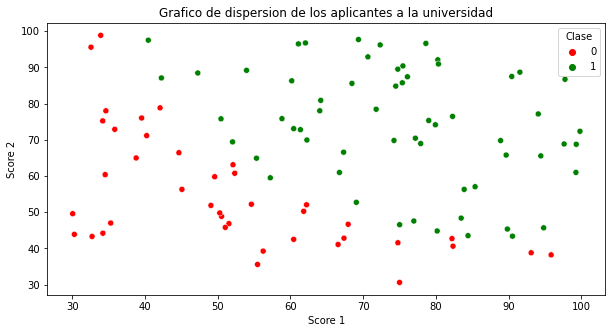

In [150]:
f,ax = plt.subplots(figsize=(10, 5))

# Cambio los colores de la paleta: no admitidos en rojo, admitidos en verde
colores = {0: "red", 1: "green"}

g = sns.scatterplot(
    x="score.1",
    y="score.2",
    data=datos,
    hue='Admision', 
    palette=colores)

g.set_title('Grafico de dispersion de los aplicantes a la universidad')
g.set_xlabel('Score 1')
g.set_ylabel('Score 2')

g.legend(title='Clase');

### Definición de la función Sigmoide

Recordemos que esta no es la función a minimizar. La utilizamos para predecir, e irá dentro de la función de coste para el cálculo de los errores. La función a programar es $\sigma \left ( x \right ) = \frac{1}{1 +e^{-x}}$

In [113]:
def funcion_sigmoide(x):
    return 1 / (1 + np.exp(-x)) # np.exp es la función de numpy para elevar el numero de Euler a otro numero

In [114]:
funcion_sigmoide(0) # cualquier número elevado a 0 es 1, luego 1 / (1 + 1) es 0.5. La función funciona

0.5

### Definición de la función de coste

Recordemos que es la función que compara lo que se predice con la realidad, para devolver el error.

In [115]:
def calcular_coste(beta, x, y): # y es el valor real del dato que se busca predecir
    m = len(y) # se utilizará para el denominador de la media 
    prediccion_y = funcion_sigmoide(np.dot(x, beta)) # la sigmoide es la función con la que predecimos, previamente definida
                                                  # np.dot() ejecuta el producto matricial de x y c
    
    error = (y * np.log(prediccion_y)) + ((1 - y) * np.log(1 - prediccion_y)) # el error se calcula con la función de coste
                                                                              # log loss, explicada arriba. 
                                                                              # np.log() calcula el logaritmo
                                                                              # "y" es el valor real, "prediccio_y" 
                                                                              # el estimado
     
    coste = -1 / m * sum(error) # el sumatorio
    
    gradiente = 1 / m * np.dot(x.transpose(), (prediccion_y - y)) # el gradiente se calcúla con las derivadas parciales 
                                                                  # respecto a los parámetros
                                                                  # np.dot() es el producto matricial de la matriz 
                                                                  # de parámetros traspuesta (transpose) y la diferencia 
                                                                  # entre el valor predecido y el real
                    
    return coste[0], gradiente # los valores que queremos

### Definición de los valores iniciales

Debido a que el método es iterativo y trabaja sobre los datos que el mismo genera, es necesario definir los valores iniciales
sobre los eque pueda trabajar

In [116]:
notas = datos[['score.1', 'score.2']].values # extraigo los valores de las notas de la tabla, para hacer la matriz de 
                                             # predicctores
    
resultado = datos['admision'].values # extraigo el valor de la variable a predecir, que se usara para calcular el error

In [117]:
# Primero hay que normalizar los datos
nota_media = np.mean(notas, axis=0)
desviacion_notas = np.std(notas, axis=0)
notas = (notas - nota_media) / desviacion_notas

# Después se construye la matriz 

filas = notas.shape[0] # numero de filas de la matriz, 100
columnas = notas.shape[1] # numero de columnas de la matriz, 2

# En mayuscula, la matriz
X = np.append(np.ones((filas, 1)), notas, axis=1) # axis = 1 para incluir la constante
y = resultado.reshape(filas, 1)  # paso la variable dependiente a forma de vector


# Defino los valores iniciales
beta_inicial = np.zeros((columnas + 1, 1))

#  Coste y gradiente inicial
coste, gradiente = calcular_coste(beta_inicial, X, y)

print('El coste inicial es :', coste, 'y el gradiente es :', gradiente)

El coste inicial es : 0.693147180559946 y el gradiente es : [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


### Descenso del gradiente

Ahora hay que porgramar el descenso de tal manera que actualice los valores en base a la tasa de aprendizaje y a la dirección que dan las derivadas de la función de coste. Tamién hay que incluir el número límite de iteraciones. El tamaño de los pasos ha de ligado a la pendiente de la curva, que indica cuando dar pasoss grandes, y cuando darlos pequeños. Cuando la pendiente se acerca a 0, hay que dar pasos cortos porque se está acercando la solución.   

In [127]:
def descenso_del_gradiente (x, y, beta, tasa_aprendizaje, iteraciones):
    
    registro_de_costes = [] # inicialización del objeto que almacenará los costes de cada iteración
    for i in range(iteraciones): # por cada elemento del rango 1 a iteraciones...
        
        coste, gradiente = calcular_coste(beta, x, y) # aplicacion de la función de coste ya definida,
                                                      # que toma como inputs los parametros 
            
        beta = beta - (tasa_aprendizaje * gradiente) # se calcula el nuevo paso en función del anterior, de la tasa 
                                                   # de aprendizaje y del gradiente
            
        registro_de_costes.append(coste) # se va añadiendo el coste a la lista 
    
    return beta, registro_de_costes

In [128]:
# Lanzamos el gradiente

tasa_aprendizaje = 0.1
iteraciones = 15000
beta, registro_de_costes = descenso_del_gradiente(X, # matriz de los valores de los predictores (las notas) y la constante 
                                                  y, # valor de la variable dependiente 
                                                  beta_inicial, # la beta que hemos inicializado antes, se va a ir actualizando 
                                                  tasa_aprendizaje = tasa_aprendizaje, 
                                                  iteraciones = iteraciones)

print('El resultado tras', iteraciones , 'iteraciones', 
      'con una tasa de aprendizaje de ', tasa_aprendizaje, 
      'es: \n beta:', beta, '\nmínimo coste:', registro_de_costes[-1])

El resultado tras 15000 iteraciones con una tasa de aprendizaje de  0.1 es: 
 beta: [[1.71844948]
 [3.99278759]
 [3.72513649]] 
mínimo coste: 0.20349770159874722


### Visualización del descenso

El gráfico siguiente muestra como va disminuyendo el error con cada iteración

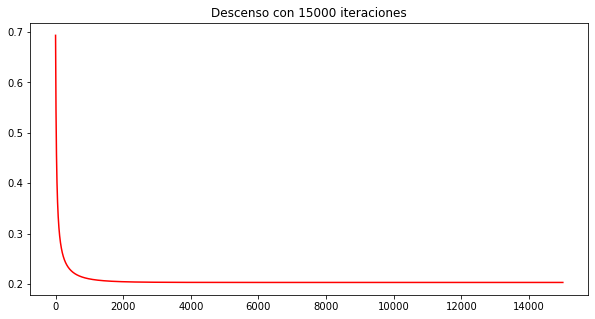

In [120]:
# Grafico del proceso
# 15000 iteraciones y tasa de aprendizaje de 0.1
f,ax = plt.subplots(figsize=(10, 5))
plt.plot(registro_de_costes, color='red')
plt.title('Descenso con 15000 iteraciones');

Podemos observar que sobran algunas iteracioens, parece que con 4000 quizá sea suficiente

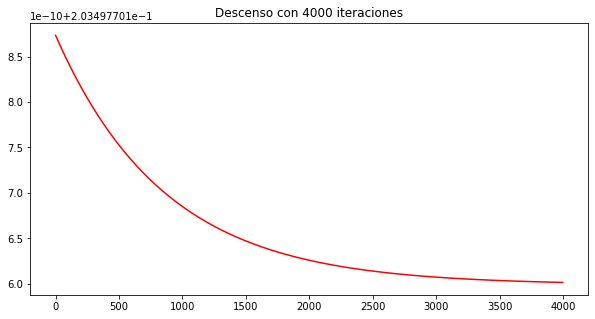

In [121]:
# Vuelvo a lanzar el gradiente
tasa_aprendizaje = 0.1
iteraciones = 4000
beta, registro_de_costes = descenso_del_gradiente(X, 
                                                  y, 
                                                  beta_inicial, 
                                                  tasa_aprendizaje = tasa_aprendizaje, 
                                                  iteraciones = iteraciones)


# 4000 iteraciones y tasa de aprendizaje de 0.1
f,ax = plt.subplots(figsize=(10, 5))
plt.plot(registro_de_costes, color='red')
plt.title('Descenso con 4000 iteraciones');

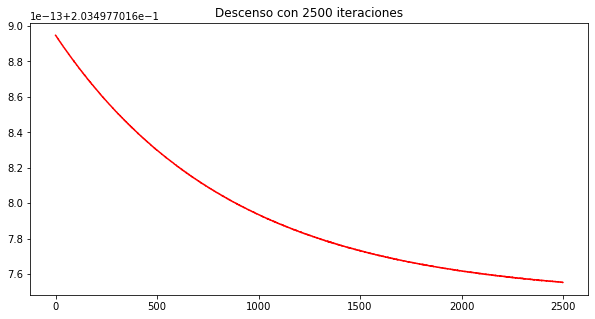

In [126]:
# Vuelvo a lanzar el gradiente, ahora con 2500
tasa_aprendizaje = 0.1
iteraciones = 2500
beta, registro_de_costes = descenso_del_gradiente(X, 
                                                  y, 
                                                  beta_inicial, 
                                                  tasa_aprendizaje = tasa_aprendizaje, 
                                                  iteraciones = iteraciones)


# 1200 iteraciones y tasa de aprendizaje de 0.1
f,ax = plt.subplots(figsize=(10, 5))
plt.plot(registro_de_costes, color='red')
plt.title('Descenso con 2500 iteraciones');

### Predicciones

Naturalmente, los parámetros obtenidos durante el proceso pueden utilizarse para predecir. Recordemos que el objetivo es 
encontrar los parámetros que minimizan la función de coste, o sea, que predicen mejor. A continuación se define la función para 
poder calcular la precisión

In [123]:
def predictor (beta, x):
    resultado = x.dot(beta)
    return resultado > 0

In [124]:
pred = predictor(beta, X) # aplico la prediccion sobre los datos para ver las metricas de entrenamiento
    
print('Precisión en entrenamiento:', sum(pred == y)[0],'%')

Precisión en entrenamiento: 89 %


In [125]:
# Lo pruebo sobre datos nuevos

# Defino las notas del candidato 
primera_nota = 85
segunda_nota = 55

# Construyo el vector y normalizo los datos
test = np.array([primera_nota, segunda_nota]) 
test = (test - nota_media) / desviacion_notas
test = np.append(np.ones(1), test)

probabilidad_ingreso = funcion_sigmoide(test.dot(beta))

print('Una persona con un', primera_nota, 'en el primer examen', 
      'y un', segunda_nota, 'en el segundo examen tiene una probabilidad de entrar  de', np.round(probabilidad_ingreso[0], 2))

Una persona con un 85 en el primer examen y un 55 en el segundo examen tiene una probabilidad de entrar  de 0.97


## Referencias 
A continuación se incluyen las referencias del material empleado para la práctica
- Stat Quest: canal de Machine Learning con explicaciones teóricas. [Gradient Descent, Step-by-Step (regresión lineal)](https://www.youtube.com/watch?v=sDv4f4s2SB8)
- Repositorio con el material de clase: [Diego Bodas: machine_learning_basics](https://github.com/diegobodas/machine_learning_basics)
- Repositorio con explicación del proceso: [lmntrixsid](https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python)
- Ecuaciones en LaTex: [LaTex/Mathematics](https://en.wikibooks.org/wiki/LaTeX/Mathematics)